## Methodology

* Load data
* Data exploration
* Data processing
* Models
* Evaluation
* Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

* Load Data



In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Titanic/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

* Data exploration

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


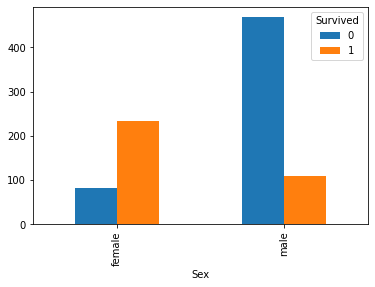

In [ ]:
groups = train.groupby(['Survived', 'Sex']).count()['PassengerId']
print(groups)
(groups.unstack(level=0).plot.bar())
plt.show()

* Data processing

In [ ]:
pd.isnull(train).sum()
# pd.isnull(test).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# train
train['Sex'] = train['Sex'].replace(['female', 'male'], [0,1])
test['Sex'] = test['Sex'].replace(['female', 'male'], [0,1])

train['Embarked'] = train['Embarked'].replace(['Q', 'S', 'C'], [0,1,2])
test['Embarked'] = test['Embarked'].replace(['Q', 'S', 'C'], [0,1,2])

train['Age'] = train['Age'].replace(np.nan, 30)
test['Age'] = test['Age'].replace(np.nan, 30)

In [ ]:
train['Embarked'] = train['Embarked'].replace(np.nan, 2)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [ ]:
Xtrain = train[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
Ytrain = train['Survived']
Xtest = test[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
Xtrain.shape, Ytrain.shape, Xtest.shape

((891, 6), (891,), (418, 6))

* Models

In [ ]:
# Logistic Regression
l_regr = LogisticRegression()
l_regr.fit(Xtrain, Ytrain)

LogisticRegression()

In [ ]:
# SVM
svc = SVC()
svc.fit(Xtrain, Ytrain)

SVC()

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=3)

* Evaluation

In [ ]:
def conf_mat_acc(model):
  disp = plot_confusion_matrix(model, Xtrain, Ytrain, cmap='hot', values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.88


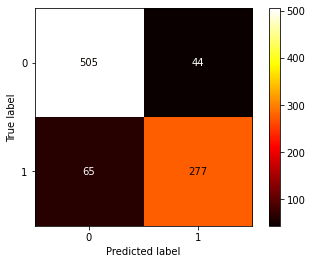

In [ ]:
# conf_mat_acc(l_regr)
# conf_mat_acc(svc)
conf_mat_acc(knn)

* Prediction

In [ ]:
# Prediction Xtest
y_pred = knn.predict(Xtest)

In [ ]:
# para descargar en ordenador
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('Titanic_Model.csv', index=False)

In [ ]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
len(y_pred), len(output)

(418, 418)

In [ ]:
test.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64